<a href="https://colab.research.google.com/github/HuyKhoi-code/CS114.K21/blob/master/predict_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np 
data = pd.read_csv('https://cs.uit.edu.vn/data.txt', sep = ',' , names=['input size','time'] )
print(data.shape)
data.head()

(5211, 2)


,input size,time
0,4032139,1.200580
1,2055486,0.509774
2,5626651,1.476080
3,42065,0.007651
4,6297788,1.661560


In [0]:
data["size^2"] = data['input size'] * data['input size']
data["size*log(size)"] = data['input size'] * np.log10(data['input size'])
columns_title = ['input size' , 'size^2' , 'size*log(size)' , 'time']
data = data.reindex(columns = columns_title)
data.head()

,input size,size^2,size*log(size),time
0,4032139,16258144915321,2.663444e+07,1.200580
1,2055486,4225022696196,1.297611e+07,0.509774
2,5626651,31659201475801,3.798130e+07,1.476080
3,42065,1769464225,1.945052e+05,0.007651
4,6297788,39662133692944,4.281984e+07,1.661560


In [0]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

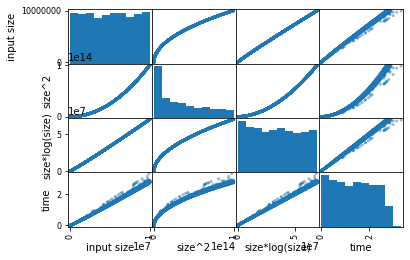

In [0]:
scatter_matrix(data)

pyplot.show()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]
print (X.shape , y.shape)

(5211, 3) (5211,)


In [0]:
#print (X.head , y.head)
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.20 , random_state=1)
"""X_train = X_train.values.reshape(-1,1)
X_valid = X_valid.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
y_valid = y_valid.values.reshape(-1,1)"""

'X_train = X_train.values.reshape(-1,1)\nX_valid = X_valid.values.reshape(-1,1)\ny_train = y_train.values.reshape(-1,1)\ny_valid = y_valid.values.reshape(-1,1)'

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [0]:
DT_model = DecisionTreeRegressor(random_state = 1 , max_depth = 10)
DT_model.fit(X_train , y_train)
val_pred_1 = DT_model.predict(X_valid)
print (val_pred_1[1])
print (mean_absolute_error(val_pred_1 , y_valid))

2.52731
0.02905356031169131


In [0]:
RF_model = RandomForestRegressor(random_state = 1 ,  n_estimators = 24)
RF_model.fit(X_train , y_train)
val_pred_2 = RF_model.predict(X_valid)
print (mean_absolute_error(y_valid , val_pred_2))

0.028755776509535272


In [0]:
LR_model = LinearRegression()
LR_model.fit(X_train , y_train)
val_pred_3 = LR_model.predict(X_valid)
print (mean_absolute_error(y_valid , val_pred_3))

0.022466738960920524


In [0]:
models = []
models.append(('DT' , DecisionTreeRegressor(max_depth = 10 , random_state = 1)))
models.append(('RF' , RandomForestRegressor(n_estimators= 25 , random_state = 1)))
models.append(('LR' , LinearRegression()))
result = []
names = []
for name , model in models:
  model.fit(X_train , y_train)
  val_pred = model.predict(X_valid)
  Test_result = mean_absolute_error(val_pred , y_valid)
  print (name , Test_result)

DT 0.02905356031169131
RF 0.02880760055483618
LR 0.022466738960920524


Linear regression is the best model

Predict new data

In [0]:
new_data = {'input size':[2055486] ,
            'size^2':[2055486*561616],
            'size*log(size)': [2055486*np.log10(2055486)]}
data_convert=pd.DataFrame.from_dict(new_data) 
print (LR_model.predict(data_convert))

ValueError: ignored

In [0]:
[[1.48461264]
 [2.09029211]
 [0.52969084]
 [1.5442148 ]]